In [1]:
from pathlib import Path
import pandas as pd
import pint
import pint_pandas
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ROOT = Path.cwd().parent
VERSION = "01"
DATA_TYPE = "Test"
print(ROOT)

/Users/thomassimader/Documents/NIRB


In [7]:
df_path = ROOT  / "data" / VERSION/ f"{DATA_TYPE.lower()}_samples.csv"
assert df_path.exists()
df_training = pd.read_csv(df_path, header=[0, 1])
df_training : pd.DataFrame = df_training.pint.quantify(level = -1)
for column in df_training.columns:  # Loop through the first level of the column multi-index
    df_training[column] = df_training[column].apply(lambda x: x.magnitude)  # Apply unit (adjust 'meter' to fit your case)


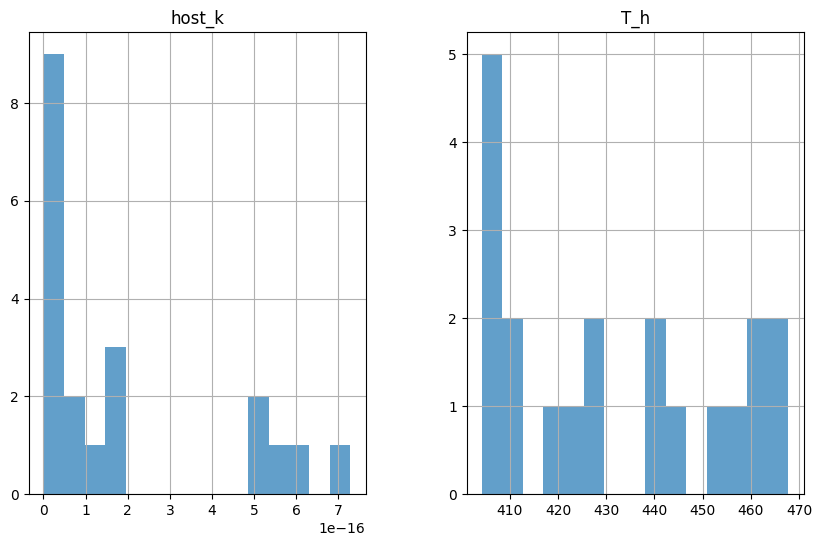

In [9]:
df_training.hist(bins=15, figsize=(10, 6), alpha=0.7);
plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it


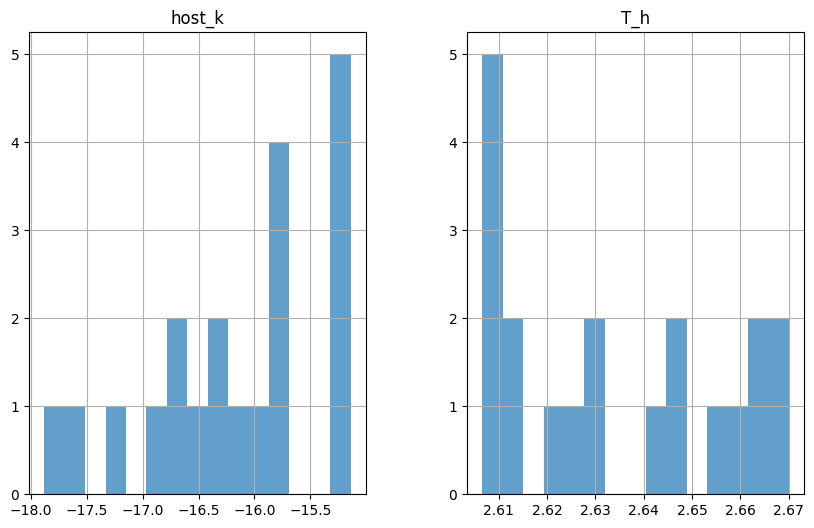

In [10]:
df_training.apply(lambda x : np.log10(x)).hist(bins=15, figsize=(10, 6), alpha=0.7);
plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram_log.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it